In [488]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets 
from sklearn import metrics


from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error  #  'neg_mean_squared_error'
from sklearn.metrics import r2_score 

from sklearn.metrics import make_scorer

In [407]:
# load the boston data, sklearn.utils.Buncn type data 
data = datasets.load_boston()
# print (data.DESCR)

In [408]:
colnames = list(data.feature_names)
len(colnames)

13

In [409]:
price = pd.DataFrame(data.target)
print (type(price))
price.shape

<class 'pandas.core.frame.DataFrame'>


(506, 1)

In [410]:
x = pd.DataFrame(data.data)
# rename colnames
x.columns = colnames 
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [510]:
slices = [45, 34, 12]
x.index.ravel()[slices]

array([45, 34, 12], dtype=int64)

In [511]:
slices = [45, 34, 12]
price.index.ravel()[slices]

array([45, 34, 12], dtype=int64)

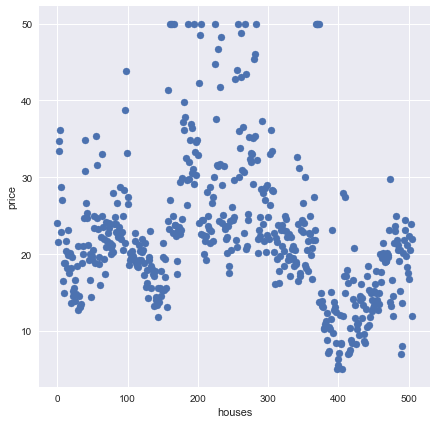

In [508]:
fig = plt.figure(figsize = (7, 7))

plt.scatter(list(x.index), price)
plt.xlabel('houses')
plt.ylabel('price')

plt.show()

### Trained RF regressor (criterion='mse') scores 

In [413]:
# train test split, which also has the shuffle parameter, by default shuffle = True
x_train, x_test, y_train, y_test = train_test_split(x, price, test_size = 0.2, random_state = 0)


# meaning of random state in RF here - control the randomness in feature subset selection at each split  

regr = RandomForestRegressor(random_state = 0)
regr.fit(x_train, y_train)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

### built-in and self defined MSE, r^2 comparison

#### R^2 assesses goodness of fit of the model

In [416]:
# coefficient of determination R^2 of the prediction, amount of variation in the depdent variable explained by the independent  variabels
print ('built-in r^2 score is {}'.format(regr.score(x_test, y_test)))

# definition of coefficient of determination
r2 = 1 - sum((np.ravel(y_test) - regr.predict(x_test)) **2) /sum((np.ravel(y_test) - np.ravel(y_test).mean()) ** 2)

print ('defined variation explained by the model r^2 score is {}'.format(r2))

built-in r^2 score is 0.7234367743733019
defined variation explained by the model r^2 score is 0.7234367743733021


In [421]:
from sklearn.metrics import mean_squared_error  

## built-in testing MSE 
y_pred = regr.predict(x_test)
print (mean_squared_error(y_test, y_pred))

## built-in training MSE
print (mean_squared_error(y_train, regr.predict(x_train)))

22.5201117647
2.04637747525


In [424]:
# self-defined MSE function

def MSE(x, y, model):
    predicts = model.predict(x)
    sse = []
    
    for i in range(len(predicts)):
        sse.append((y.iloc[i] - predicts[i]) **2)

    MSE = sum(sse)/len(predicts)
    return MSE

In [425]:
## self defined testing MSE 
print (MSE(x_test, y_test, regr))

## self defiend training MSE
print (MSE(x_train, y_train, regr))

0    22.520112
dtype: float64
0    2.046377
dtype: float64


#### KFold is only a splitter that can be used to implement CV manually 

In [450]:
# Provides train/test indices to split data in train/test sets. 
# Split dataset into k consecutive folds. default shuffle = False
# Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

from sklearn.model_selection import KFold 

kf = KFold(n_splits = 10, random_state = 0)

print (kf.get_n_splits(x))

10


In [469]:
# for train_index, test_index in kf.split(x):
#     print('TRAIN:' ,train_index, 'TEST:' , test_index)

In [512]:
# print (train_index.shape)
# print (test_index.shape)

In [517]:
# CV with KFold manually 

# [regr.fit(x.index.ravel()[train_index], price.index.ravel()[train_index]).score(x.index.ravel()[test_index], price.index.ravel()[test_index]) for train_index, test_index in kf.split(x.index.ravel())]

In [454]:
# cross_val_score helper function uses KFold automatically in implementing cross validation when called upon 

print ((cross_val_score(regr, x, np.ravel(price), cv = kf, scoring = 'neg_mean_squared_error')).shape)

np.mean(cross_val_score(regr, x, np.ravel(price), cv = kf, scoring = 'neg_mean_squared_error'))

(10,)


-24.341840454901963

In [491]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

MSE = make_scorer(mean_squared_error)
np.mean(cross_val_score(regr, x, np.ravel(price), cv = kf, scoring = MSE))

24.341840454901963

### MSEs are the same for the followings 
- self defined
- sklearn.metrics.mean_squared_error
- sklearn.mode_selection.cross_val_score scoring ='neg_mean_squared_error' 


## Cross Validation in expected testing error estimation

### sklearn.model_selection. cross_val_score
### self-defiend MSE in self-defined MSE
### sklearn.model_selection. ShuffleSplit

The cross_validate function differs from cross_val_score in two ways 
- It allows specifying multiple metrics for evaluation.
- It returns a dict containing training scores, fit-times and score-times in addition to the test score.

Random Initialization
Some cross validation iterators, such as KFold, have an inbuilt option to shuffle the data indices before splitting them. Note that:
- This consumes less memory than shuffling the data directly.
- By default no shuffling occurs, including for the (stratified) K fold cross- validation performed by specifying cv=some_integer to cross_val_score, grid search, etc. Keep in mind that train_test_split still returns a random split.
- The random_state parameter defaults to None, meaning that the shuffling will be different every time KFold(..., shuffle=True) is iterated. However, GridSearchCV will use the same shuffling for each set of parameters validated by a single call to its fit method.
- To get identical results for each split, set random_state to an integer.

#### model_selection.cross_val_score

In [519]:
# cross_val_score wants y as  np array instead of pd data frame 
# CV in estimating EXPECTED testing error 

regr = RandomForestRegressor(random_state = 0)

folds = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400]
n_folds = len(folds)
neg_mean_squared_error = []
n = x.shape[0]

# Run K-folds
for k in folds:
    scores = cross_val_score(regr, x, np.ravel(price), cv = k, scoring = 'neg_mean_squared_error')
    neg_mean_squared_error.append(scores.mean())
 
    print("K = {}, neg_mean_squared_error: {}".format (k, neg_mean_squared_error[-1]))

K = 10, neg_mean_squared_error: -24.341840454901963
K = 20, neg_mean_squared_error: -25.02860116923077
K = 50, neg_mean_squared_error: -20.55630070909091
K = 100, neg_mean_squared_error: -17.627685333333332
K = 150, neg_mean_squared_error: -18.767784666666664
K = 200, neg_mean_squared_error: -14.287764333333335
K = 250, neg_mean_squared_error: -13.2710046
K = 300, neg_mean_squared_error: -12.544372
K = 350, neg_mean_squared_error: -12.877516428571427
K = 400, neg_mean_squared_error: -12.645282125


### cross_val_score calls KFold automatically to split the data and compute test error 

In [525]:
# the above should be the same as the following implementation using KFold and make_scorer 

regr = RandomForestRegressor(random_state = 0)
folds = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400]
n_folds = len(folds)
MSE = make_scorer(mean_squared_error)
MSE_error_list = [] 

for k in folds:
    kf = KFold(n_splits = k, random_state = 0)
    scores = cross_val_score(regr, x, np.ravel(price), cv = kf, scoring = MSE)
    MSE_error_list.append(np.mean(scores))
    
    print ('{} folds cv estimates of test error is {}'.format(k, MSE_error_list[-1]))

10 folds cv estimates of test error is 24.341840454901963
20 folds cv estimates of test error is 25.02860116923077
50 folds cv estimates of test error is 20.55630070909091
100 folds cv estimates of test error is 17.627685333333332
150 folds cv estimates of test error is 18.767784666666664
200 folds cv estimates of test error is 14.287764333333335
250 folds cv estimates of test error is 13.2710046
300 folds cv estimates of test error is 12.544372
350 folds cv estimates of test error is 12.877516428571427
400 folds cv estimates of test error is 12.645282125


In [559]:
## use range to create arry for  ticker location indication

# [range(1, n_folds + 1), MSE_error_list, [5] * n_folds]
range(1, n_folds + 1), MSE_error_list, np.sqrt(MSE_error_list)

# range(0, n_folds + 2), [''] + [str(k) for k in folds] + ['']

(range(1, 11),
 [24.341840454901963,
  25.028601169230772,
  20.556300709090909,
  17.627685333333332,
  18.767784666666664,
  14.287764333333335,
  13.271004599999999,
  12.544371999999999,
  12.877516428571427,
  12.645282125],
 array([ 4.93374507,  5.0028593 ,  4.53390568,  4.19853371,  4.33218013,
         3.77991592,  3.64293901,  3.5418035 ,  3.58852566,  3.55602055]))

### CI for CV expected test error estimation 
- generally lower k, higher bias, lower variance of the estiamted test error 
- generally higher k, lower bias, higher variance of the estiamted expected test error 
- too high k, higher correlations among the data sets used to train the model in each fold (LOOCV as an extreme case), high variance, almost no bias of the estiamted expected test error

strictly speaking  
95% CI for mean estimates with unknow standard error follows xbar +/- 1.96 * standard error of estimator/ sqrt(sample size n)

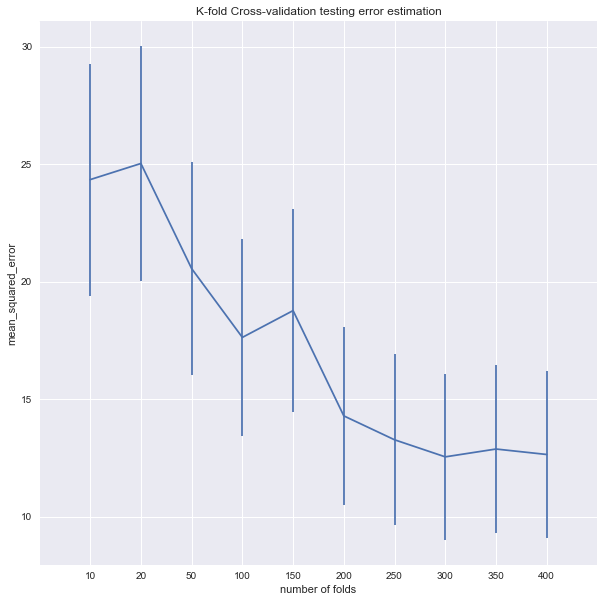

In [557]:
# plot cv test estimation and standard error of the estiamtion together  
# 95% CI of the mean (estimates of expected test error)

fig = plt.figure(figsize = (10, 10))
plt.errorbar(range(1, n_folds + 1), MSE_error_list, np.sqrt(MSE_error_list))  
ax = plt.gca()
plt.xticks(range(0, n_folds + 2), [''] + [str(k) for k in folds] + [''])
# plt.yticks(range(30, 110, 10))

plt.title("K-fold Cross-validation testing error estimation")
plt.xlabel("number of folds")
plt.ylabel("mean_squared_error")

### bias and variance from k folds cross validation estimation of expected test error 
#### ideally, this estimation of error should be close to zero
To check out you model’s bias, find out the mean of all the error estiamtes. If this value is low, it basically means that your model gives low error on an average– indirectly ensuring that your model’s notions about the data are accurate enough.

To check out your model’s variance, compute the standard deviation of all the error estimates. If this value is high, it means that your model’s performance varies a lot with the dataset used for training.

In [551]:
# fig = plt.figure(figsize = (10, 10))
# plt.errorbar(range(1, n_folds + 1), MSE_error_list, yerr=[5] * n_folds)  # Use 5% for the error bars
# ax = plt.gca()
# plt.xticks(range(0, n_folds + 2), [''] + [str(k) for k in folds] + [''])
# # plt.yticks(range(30, 110, 10))

# plt.title("K-fold Cross-validation testing error estimation")
# plt.xlabel("number of folds")
# plt.ylabel("mean_squared_error")

In [553]:
# when the number of folds is 400, training sample size is around 504, which is like using all the sample data in training the model
# test error stablizes after 300 folds
(x.shape[0]/ 400) *399
print ((x.shape[0]/ 300) *299)

504.31333333333333


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


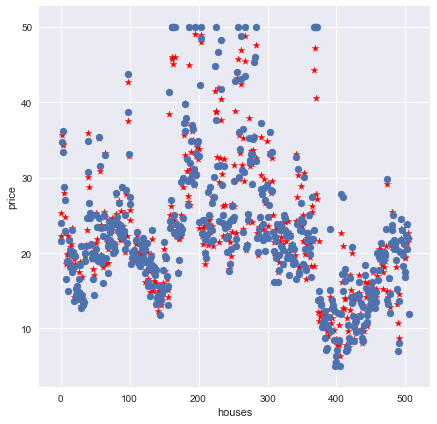

In [338]:
regr.fit(x_train, y_train)

fig = plt.figure(figsize = (7, 7))

fig.add_subplot(1, 1, 1)
plt.scatter(list(x.index), y = regr.predict(x), color = 'r', marker = '*')

plt.scatter(list(x.index), price)
plt.xlabel('houses')
plt.ylabel('price')

plt.show()

### CV Folds and leanring curve 

too large the K could lead to overestimation of the EXPECTED testing error as training set inclues most of the sample data available 
the large K could also leads to higher run time and  higher varince 
when the slope of learning curve is flat for 90% of the data, it's ok to ignore the bias and use k = 10

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

In [252]:
# Learning Curve - Determines cross-validated training and test scores for different training set sizes
## If the slope of the learning curve is flat enough at training_size = 90% of total dataset, then the bias can be ignored and K=10 is reasonable.


from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


In [279]:
# help(ShuffleSplit)

In [281]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize = (10, 10))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("neg_MSE Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring = 'neg_mean_squared_error', n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt


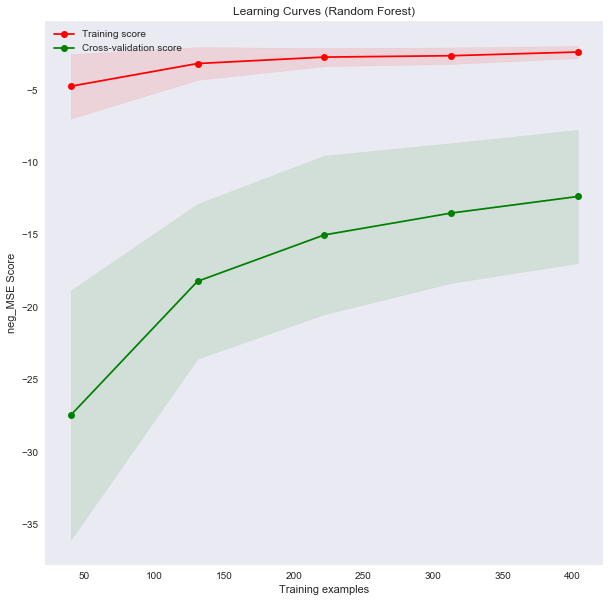

In [285]:
title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(regr, title, x, price, # ylim=(0.7, 1.01), 
                    cv=cv, n_jobs=4)

plt.show()

### When a fit has high bias, the training and cross-validation error converge at high error values. When a fit has high variance, as the number of samples increases, the gap between the training error and cross-validation error remains large. 

#### self-defined MSE and  self-defined CV

In [340]:
# self-defined MSE function

def MSE(x, y, model):
    predicts = model.predict(x)
    sse = []
    
    for i in range(len(predicts)):
        sse.append((y[i] - predicts[i]) **2)

    MSE = sum(sse)/len(predicts)
    return MSE

In [341]:
# split data into k folds

def cv_split(data, kfold):
    index_test = []
    index_train =[]
    fold_size = int(data.shape[0] / kfold)
    
    for i in range(kfold):
        
        index_te = random.sample(range(data.shape[0]), fold_size)
        index_tr = list(set(range(data.shape[0])) - set(index_te))
        
        index_test.append(index_te)
        index_train.append(index_tr)
    
    return index_test, index_train

In [342]:
# get cv result with MSE scores

def cv_cal(x, y, model, kfold):
    cv_MSE = []
    for i in range (kfold):
        
        index_test, index_train = cv_split(x, kfold)
        y_test = y[index_test[i]]
        x_test = x.iloc[index_test[i]]
        
        x_train = x.iloc[index_train[i]]
        y_train = y[index_train[i]]
        
        fitted = model.fit(x_train, y_train)
       
        cv_MSE.append(MSE(x_test, y_test, fitted))
        
    return cv_MSE

In [356]:
from random import seed
# seed(0)

regr = RandomForestRegressor(random_state = 0)

kf = int(x.shape[0]/2)
# kf = 10 
cv_MSE = cv_cal(x, np.ravel(price), regr, kfold = kf)

# print (cv_MSE)
sum(cv_MSE)/ kf

12.228072134387359

In [362]:
plot_mse = []
for kf in range(10, 50):
    seed(0)
    regr = RandomForestRegressor(random_state = 0)
    plot_mse.append(sum(cv_cal(x, np.ravel(price), regr, kfold = kf))/kf)

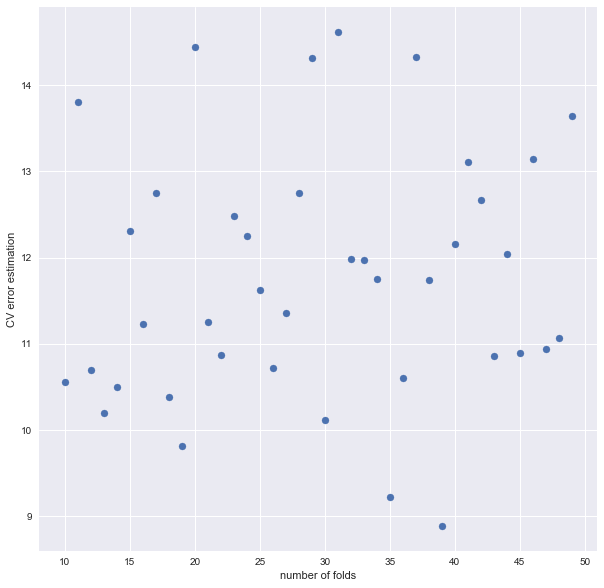

In [364]:
fig = plt.figure(figsize = (10, 10))

plt.scatter (range(10, 50), plot_mse)
plt.xlabel('number of folds')
plt.ylabel('CV error estimation')

plt.show()

In [357]:
int(x.shape[0]/2)

253

## Tuning & Cross Validation 
### sklearn.model_selection.GridSearchCV
### self-defined gready search tuning 

In [ ]:
# self-defined MSE function

def MSE(x, y, model):
    predicts = model.predict(x)
    sse = []
    
    for i in range(len(predicts)):
        sse.append((y.iloc[i] - predicts[i]) **2)

    MSE = sum(sse)/len(predicts)
    return MSE

In [ ]:
def search_alpha(alphas):
    
    raw_mse = {}

    for j in alphas:

        MSE_list = []
        for i in range(5):
        # need to iterate through each fold of the splited data and train, test, calculate the averaged MSE            
            x_train, x_test, y_train, y_test =  train_test_split(data2[featurelist], data2['MKTCAP'], test_size = 0.2, random_state = 0 )
            lasso = linear_model.Lasso(alpha = j)
            lasso.fit(x_train, y_train)
            MSE_list.append(MSE(x_test, y_test, lasso))

            raw_mse[j] = MSE_list   

    return raw_mse

### self defined GridSearch

In [ ]:
alphas = list(np.arange(0.01, 1, 0.01) )
raw = search_alpha(alphas)

In [ ]:
mse = []
for i in raw.keys():
    mse.append(sum(raw[i])/len(raw[i]))

print (min(mse))

In [ ]:
fig = plt.figure(figsize = (10, 10))

plt.scatter(alphas, mse, marker = '*')
plt.xlabel('alpha')
plt.ylabel('mse')

plt.show()

### built-in GridSearchCV

In [ ]:

# prepare a range of alpha values to test
param_grid = {
#               "alpha":[0, 1, 0.1]
                "alpha": np.arange(0, 1, 0.01)
             }

# create and fit a lasso regression model, testing each alpha
lasso = Lasso()
# This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function
# or scoring must be passed.

#### would still want to use mean squared error instead of r^2
grid = GridSearchCV(estimator = lasso, scoring = 'r2', param_grid = param_grid )
grid.fit(dataset.data, dataset.target)
print(grid)


# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

In [ ]:
fig = plt.figure(figsize = (7, 7))

scores = grid.cv_results_['mean_test_score']
alphas = np.arange(0, 1, 0.01)
plt.scatter(alphas, scores, marker = '*')

plt.show()